In [1]:
#---Bubble Chart---
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

#----Pie Chart-----
#% of Total Fares by City Type
#% of Total Rides by City Type
#% of Total Drivers by City Type

#Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.colors
from pylab import *
from scipy import *
import matplotlib.patches as mpatches

In [2]:
#Pulling in the data
city_path = "generated_data/city_data.csv"
ride_path = "generated_data/ride_data.csv"
#Reading data
city_df = pd.read_csv(city_path, encoding="utf-8")
ride_df = pd.read_csv(ride_path, encoding="utf-8")

In [3]:
#Looking at DF
city_df.head()

,city,driver_count,type
0,Tammyburgh,11,Urban
1,Melissaborough,15,Urban
2,Port Brianborough,62,Urban
3,New Katherine,68,Urban
4,Lake Charlesside,65,Urban


In [4]:
#Merging on 'city
merge_df = pd.merge(ride_df, city_df, how='outer', on='city')
merge_df = merge_df.sort_values("city")
merge_df = merge_df.reset_index(drop=True)
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Adamschester,2017-01-01 13:43:33,48.33,5433192651081,27,Suburban
1,Adamschester,2017-01-02 16:19:03,31.09,7079690106388,27,Suburban
2,Adamschester,2017-01-01 04:06:31,12.97,1970667817299,27,Suburban
3,Adamschester,2017-01-03 06:15:43,39.39,8562770005118,27,Suburban
4,Adamschester,2017-01-01 16:49:22,14.17,6979569807501,27,Suburban


In [5]:
#Numerating the City Types so they can correspond with bubble color
merge_df['type'] = merge_df['type'].str.replace('Urban','1')
merge_df['type'] = merge_df['type'].str.replace('Suburban','2')
merge_df['type'] = merge_df['type'].str.replace('Rural','3')


In [6]:
#Converting type to integer
merge_df['type'] = merge_df['type'].astype(int)
merge_df['type'].unique()

array([2, 1, 3], dtype=int64)

In [7]:
#Sampling the data to create space on the plot
merge_df = merge_df.sample(frac=0.1)
merge_df.count()

city            238
date            238
fare            238
ride_id         238
driver_count    238
type            238
dtype: int64

In [8]:
#Looping to grab some random samples in the Fares column
div = 20
lim = len(merge_df) // div
samples = [merge_df.iloc[(i * div):(i * div + div), 2]
           for i in range(0, lim)]

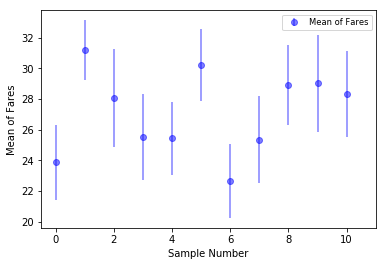

In [9]:
# Checking Standard Error Measurements
means = [s.mean() for s in samples]
sem = [s.sem() for s in samples]
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(means)), means, yerr=sem, fmt="o", color="b",
            alpha=0.5, label="Mean of Fares")

ax.set_xlim(-0.5, len(means))
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Fares")

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [10]:
#Breaking down by city types
#--------------------------
#urban Breakdown
urbangroup = merge_df.loc[merge_df['type'] == 1,:]
urbangroup = urbangroup.sort_values("city")
urbangroup = urbangroup.reset_index(drop=True)
urbangroup.head()

,city,date,fare,ride_id,driver_count,type
0,Alexisfort,2017-01-02 20:59:13,34.34,8805663343516,24,1
1,Alexisfort,2017-01-01 23:04:18,12.96,2646410316386,24,1
2,Alexisfort,2017-01-01 08:35:47,5.75,689677502842,24,1
3,Alexisfort,2017-01-01 05:29:25,40.10,9106736762371,24,1
4,Brianfurt,2017-01-03 00:54:46,31.68,4930297982122,4,1


In [11]:
#suburban Breakdown
suburbangroup = merge_df.loc[merge_df['type'] == 2,:]
suburbangroup = suburbangroup.sort_values("city")
suburbangroup = suburbangroup.reset_index(drop=True)
suburbangroup.head()

,city,date,fare,ride_id,driver_count,type
0,Adamschester,2017-01-01 23:25:56,35.95,8549491628017,27,2
1,Amberberg,2017-01-01 00:10:50,18.35,2979038106825,13,2
2,Amberberg,2017-01-02 08:39:01,18.29,5521911046390,13,2
3,Anthonyfurt,2017-01-02 06:10:52,23.58,8340450977241,17,2
4,Anthonyfurt,2017-01-02 18:04:58,41.22,2152069612682,17,2


In [12]:
#Rural Breakdown
ruralgroup = merge_df.loc[merge_df['type'] == 3,:]
ruralgroup = ruralgroup.sort_values("city")
ruralgroup = ruralgroup.reset_index(drop=True)
ruralgroup.head()

,city,date,fare,ride_id,driver_count,type
0,Davidsonfurt,2017-01-02 09:47:09,16.36,6392658180499,1,3
1,Hoganfort,2017-01-03 12:15:48,19.35,685572928589,5,3
2,Nguyenshire,2017-01-01 09:32:08,17.88,6501330258436,3,3
3,Port Jameston,2017-01-01 15:47:28,45.63,7714482032277,2,3
4,Richardsonborough,2017-01-03 05:36:06,34.64,1523382445416,9,3


In [13]:
#Taking the above merges on types and grouping them by data required on the bubble chart then placing them in variables for plotting
#----------------------------------------------------------
#Urban Fair per city breakdown
ufares = urbangroup.groupby(['city'], as_index=False).mean()[['city','fare','driver_count']]
#groupin by ride since its a count
urides = urbangroup.groupby(['city'], as_index=False).count()[['ride_id',]]
urides['ride count'] = urides['ride_id']
del urides['ride_id']
#urban x y s c setup
x = ufares['driver_count']
y = ufares['fare']
s = urides['ride count']

In [14]:
#suburban Fair per city breakdown
sfares = suburbangroup.groupby(['city'], as_index=False).mean()[['city','fare','driver_count']]
#groupin by ride since its a count
srides = suburbangroup.groupby(['city'], as_index=False).count()[['ride_id',]]
srides['ride count'] = srides['ride_id']
del srides['ride_id']
#suburban x y s c setup
sx = sfares['driver_count']
sy = sfares['fare']
ss = srides['ride count']

In [15]:
#rural Fair per city breakdown
rfares = ruralgroup.groupby(['city'], as_index=False).mean()[['city','fare','driver_count']]
#groupin by ride since its a count
rrides = ruralgroup.groupby(['city'], as_index=False).count()[['ride_id',]]
rrides['ride count'] = rrides['ride_id']
del rrides['ride_id']
#rural x y s c setup
rx = rfares['driver_count']
ry = rfares['fare']
rs = rrides['ride count']

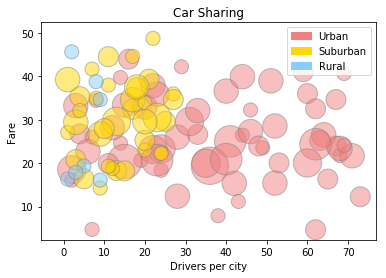

In [16]:
#Explanation

#Each bubble is a city.
# X axis is the average amount of drivers per city.
# Y is the Average Fares per city.
# C  is the bubble area: sum of rides in a city.
# Z is the color of the bubble - 

plt.title("Car Sharing")
plt.xlabel('Drivers per city')
plt.ylabel('Fare')
plt.scatter(x, y, s=s*200, c='lightcoral', alpha=0.5, edgecolors="grey", linewidth=1,)
plt.scatter(sx, sy, s=ss*200, c='gold', alpha=0.5, edgecolors="grey", linewidth=1,)
plt.scatter(rx, ry, s=rs*200, c='lightskyblue', alpha=0.5, edgecolors="grey", linewidth=1,)
Urban = mpatches.Patch(color='lightcoral', label='Urban')
Suburban = mpatches.Patch(color='gold', label='Suburban')
Rural = mpatches.Patch(color='lightskyblue', label='Rural')
plt.legend(handles=[Urban,Suburban,Rural], loc=1)



plt.show()


In [17]:
#Take away
#1) Rural areas have higher fairs on average, most likely traveling further
#2) Cities with lowers fairs take more rides
#3) Urban areas have more drivers in the city


In [18]:
#Merge 2 for pie charts
piemerge_df = pd.merge(ride_df, city_df, how='outer', on='city')
piemerge_df = piemerge_df.sort_values("city")
piemerge_df = piemerge_df.reset_index(drop=True)
piemerge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Adamschester,2017-01-01 13:43:33,48.33,5433192651081,27,Suburban
1,Adamschester,2017-01-02 16:19:03,31.09,7079690106388,27,Suburban
2,Adamschester,2017-01-01 04:06:31,12.97,1970667817299,27,Suburban
3,Adamschester,2017-01-03 06:15:43,39.39,8562770005118,27,Suburban
4,Adamschester,2017-01-01 16:49:22,14.17,6979569807501,27,Suburban


In [19]:
#grouping by type
pie_df = piemerge_df.groupby(['type'], as_index=False).sum()[['type','fare','driver_count']]
pie_df.head()

,type,fare,driver_count
0,Rural,4271.69,662
1,Suburban,18779.26,8774
2,Urban,40093.25,60935


In [20]:
#grouping by ride count to get the count instead of sum
ridecount_df = piemerge_df.groupby(['type'], as_index=False).count()[['type','ride_id']]
ridecount_df

,type,ride_id
0,Rural,125
1,Suburban,625
2,Urban,1625


In [21]:
#merging into one DF
finalpie_df = pd.merge(pie_df, ridecount_df, how='outer', on='type')
finalpie_df = finalpie_df.sort_values("type")
finalpie_df = finalpie_df.reset_index(drop=True)
finalpie_df.head()

,type,fare,driver_count,ride_id
0,Rural,4271.69,662,125
1,Suburban,18779.26,8774,625
2,Urban,40093.25,60935,1625


<function matplotlib.pyplot.show>

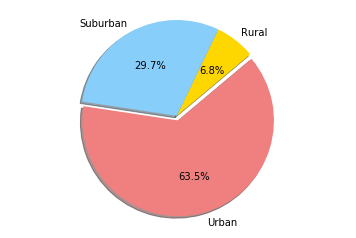

In [22]:
#Total fares by city type
colors = ['Gold', 'LightSkyBlue','LightCoral']
explode = (0, 0, 0.05)
plt.pie(finalpie_df['fare'],labels=finalpie_df['type'],explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)
plt.axis("equal")
plt.savefig("Fares.png")
plt.show

<function matplotlib.pyplot.show>

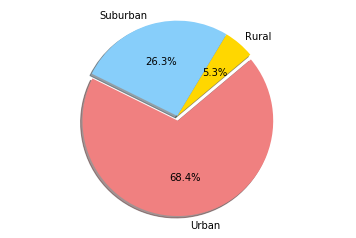

In [23]:
#Total rides by city type
colors = ['Gold', 'LightSkyBlue','LightCoral']
explode = (0, 0, 0.05)
plt.pie(finalpie_df['ride_id'],labels=finalpie_df['type'],explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)
plt.axis("equal")
plt.savefig("Rides.png")
plt.show

<function matplotlib.pyplot.show>

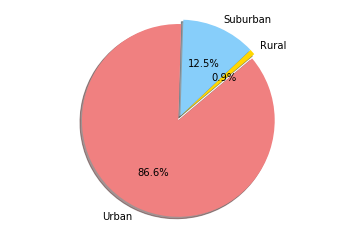

In [24]:
#Total drivers by city type
colors = ['Gold', 'LightSkyBlue','LightCoral']
explode = (0.0,0.0, 0.05)
plt.pie(finalpie_df['driver_count'],labels=finalpie_df['type'],explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)
plt.axis("equal")
plt.savefig("Drivers.png")
plt.show